In [ ]:
#Task 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'svg'
%matplotlib inline

In [2]:
from sklearn.manifold import TSNE
from sklearn.datasets import load_boston

boston = load_boston()

X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target


In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [25]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_scaled)

print('Before:\t{}'.format(X_train_scaled.shape))
print('After:\t{}'.format(X_train_tsne.shape))

Before:	(404, 13)
After:	(404, 2)


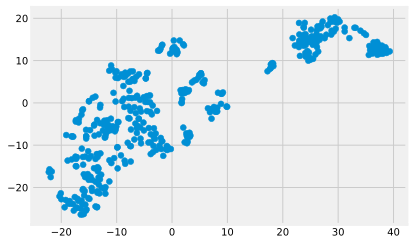

In [26]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])
plt.show()

In [ ]:
# Task 2

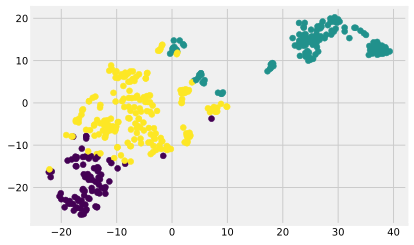

In [27]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)

labels_train = kmeans.fit_predict(X_train_scaled)

plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)

plt.show()


In [13]:
labels_test = kmeans.predict(X_test_scaled)

In [14]:
y_train.mean() #average price

22.796534653465343

In [15]:
y_train[labels_train == 0].mean() #average price for cluster 0

27.78837209302326

In [16]:
y_train[labels_train == 1].mean() #average price for cluster 1

16.165354330708663

In [17]:
y_train[labels_train == 2].mean() #average price for cluster 2

24.958115183246072

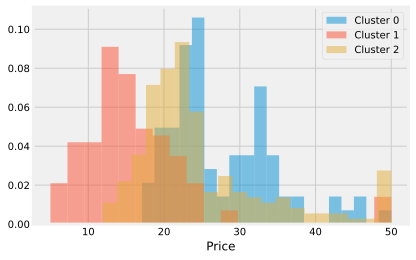

In [19]:
plt.hist(y_train[labels_train == 0], bins=20, density=True, alpha=0.5)
plt.hist(y_train[labels_train == 1], bins=20, density=True, alpha=0.5)
plt.hist(y_train[labels_train == 2], bins=20, density=True, alpha=0.5)

plt.legend(['Cluster 0', 'Cluster 1', 'Cluster 2'])
plt.xlabel('Price')

plt.show()

In [20]:
X_train.loc[labels_train == 0, 'CRIM'].mean() #average CRIM for cluster 0

0.07356558139534886

In [21]:
X_train.loc[labels_train == 1, 'CRIM'].mean() #average CRIM for cluster 1

10.797028425196853

In [22]:
X_train.loc[labels_train == 2, 'CRIM'].mean() #average CRIM for cluster 2

0.42166020942408367

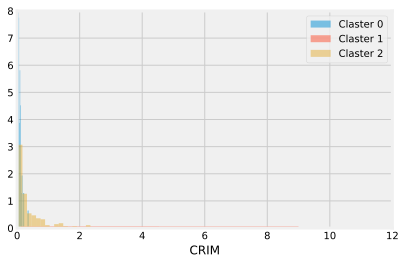

In [29]:
plt.hist(X_train.loc[labels_train == 0, 'CRIM'], bins=20, density=True, alpha=0.5)
plt.hist(X_train.loc[labels_train == 1, 'CRIM'], bins=20, density=True, alpha=0.5)
plt.hist(X_train.loc[labels_train == 2, 'CRIM'], bins=20, density=True, alpha=0.5)

plt.xlim(0, 12)
plt.ylim(0, 8)
plt.legend(['Claster 0', 'Claster 1', 'Claster 2'])
plt.xlabel('CRIM')

plt.show()

In [ ]:
# Task 3*

In [33]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
X_test_tsne = tsne.fit_transform(X_test_scaled)

print('Before:\t{}'.format(X_test_scaled.shape))
print('After:\t{}'.format(X_test_tsne.shape))

Before:	(102, 13)
After:	(102, 2)


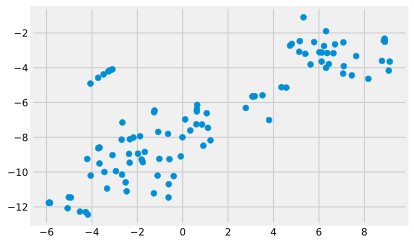

In [34]:
plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1])
plt.show()

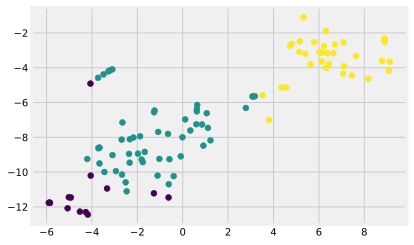

In [35]:
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)

labels_test = kmeans.fit_predict(X_test_scaled)

plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c=labels_test)

plt.show()

In [36]:
y_test.mean() #average price

21.488235294117644

In [38]:
y_test[labels_test == 0].mean() #average price for cluster 0

33.871428571428574

In [39]:
y_test[labels_test == 1].mean() #average price for cluster 1

21.552830188679245

In [40]:
y_test[labels_test == 2].mean() #average price for cluster 2

16.43714285714286

In [41]:
X_test.loc[labels_test == 0, 'CRIM'].mean() #average CRIM for cluster 0

0.08618571428571427

In [42]:
X_test.loc[labels_test == 1, 'CRIM'].mean() #average CRIM for cluster 1

0.25200716981132076

In [43]:
X_test.loc[labels_test == 2, 'CRIM'].mean() #average CRIM for cluster 2

10.165531142857143